### Principal Component Analysis (PCA)

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal the preceding components. The resulting vectors are an uncorrelated orthogonal basis set.

PCA is sensitive to the relative scaling of the original variables.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
cols=['Class','Alcohol','Malic acid','Ash','Alcalinity','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
    'Color intensity','Hue','OD280','Proline']
data.columns=cols
data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [10]:
### describe data except class columns
data.iloc[:,1:].describe()

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Boxplots by output labels/classes

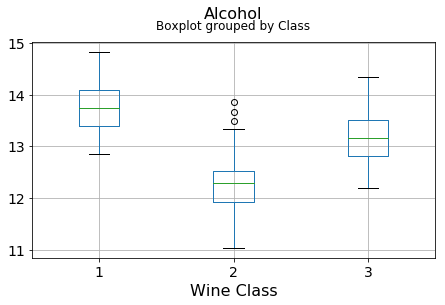

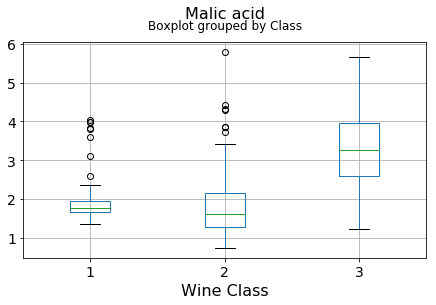

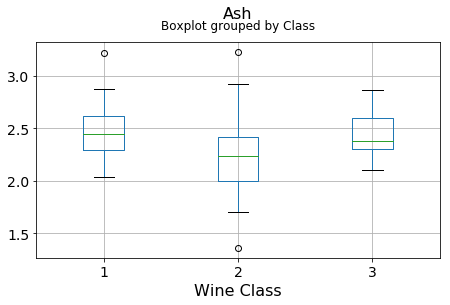

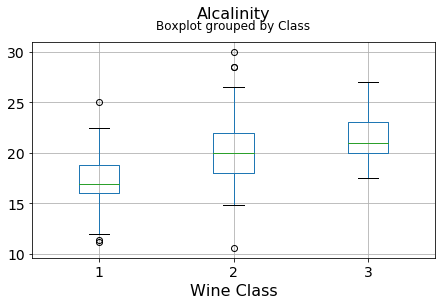

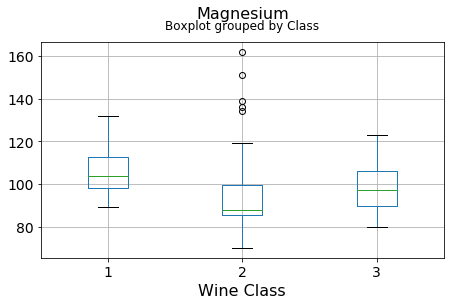

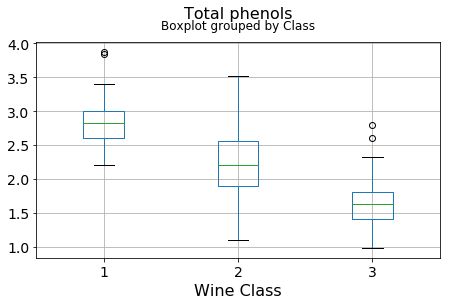

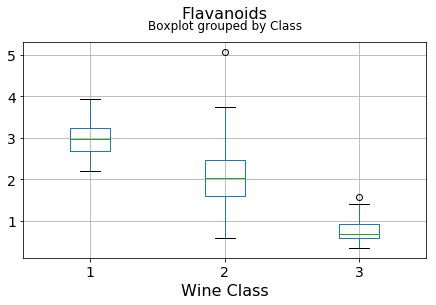

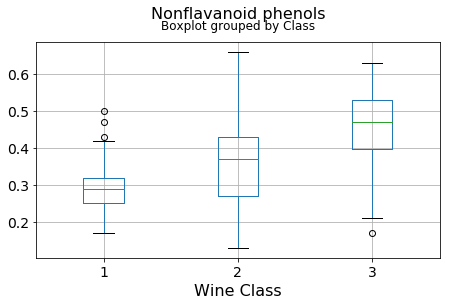

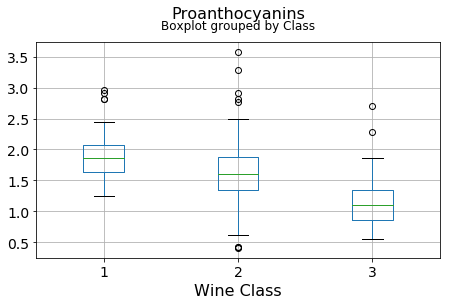

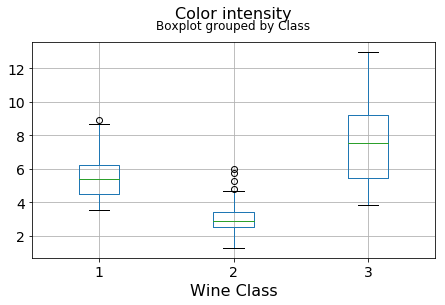

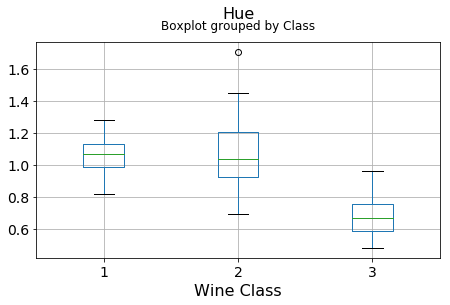

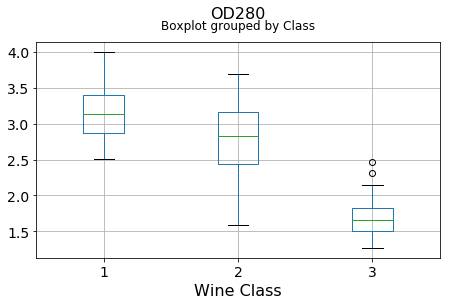

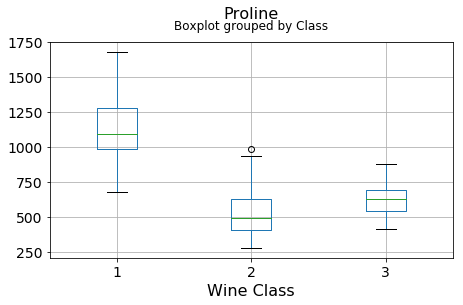

In [11]:
for c in data.columns[1:]:
    data.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Wine Class", fontsize=16)



It can be seen that some features classify the wine labels pretty clearly. For example, Alcalinity, Total Phenols, or Flavonoids produce boxplots with well-separated medians, which are clearly indicative of wine classes.

Below is an example of class seperation using two variables


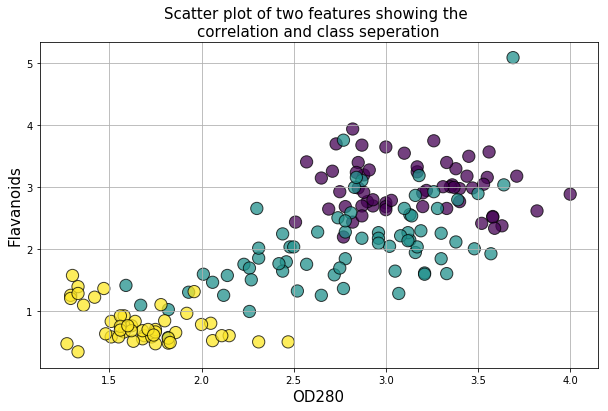

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(data['OD280'],data['Flavanoids'],c=data['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD280",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()


### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.


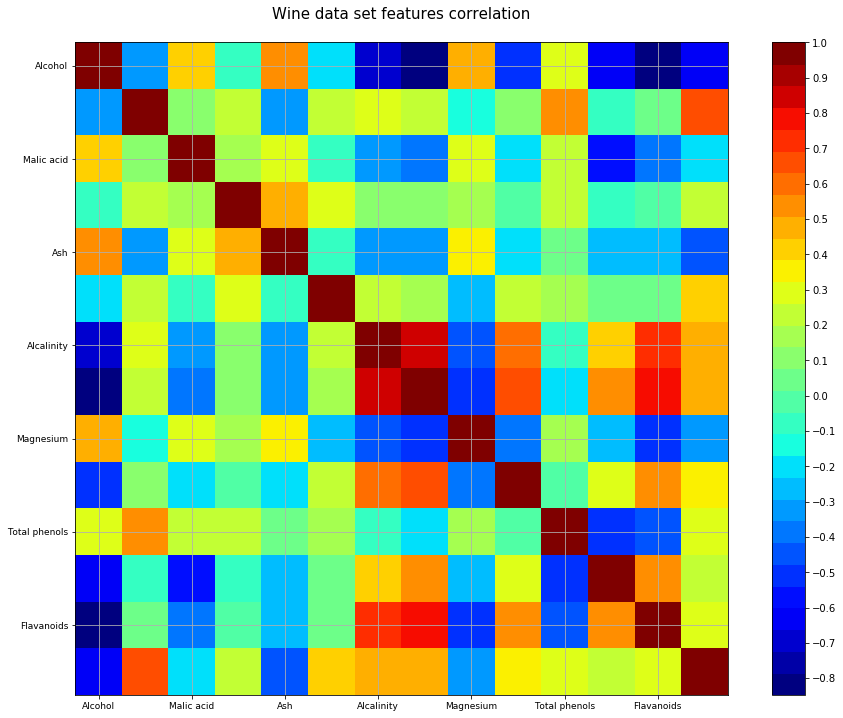

In [17]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(data)

### Principal Component Analysis  
-  Data scaling

-  PCA requires scaling/normalization of the data to work properly


In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X = data.drop('Class',axis=1)
y = data['Class']
X = scaler.fit_transform(X)
dfx = pd.DataFrame(data=X,columns=data.columns[1:])
dfx.head(10)

,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
0,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965
5,1.731299,-0.420990,0.305655,-1.478055,-0.253827,0.332548,0.498632,-0.501337,0.689650,0.084214,0.275801,1.387704,1.735400
6,1.322133,-0.170127,0.888953,-0.576243,1.514967,0.492626,0.488590,-0.420887,-0.591214,-0.002072,0.450866,1.387704,1.751324
7,2.276852,-0.627056,-0.715117,-1.658418,-0.183075,0.812784,0.960557,-0.581788,0.689650,0.062643,0.538398,0.349457,0.955129
8,1.074155,-0.886878,-0.350556,-1.057210,-0.112323,1.100925,1.131268,-1.144940,0.461551,0.934132,0.232035,1.345036,0.955129
9,1.371729,-0.161168,-0.241187,-0.456001,0.382939,1.052902,1.301980,-1.144940,1.391493,0.299929,1.282424,0.804579,2.436052


In [22]:
dfx.describe()


,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280,Proline
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-2.609338e-16,4.252719e-16,-4.378168e-16,-6.410440e-16,-1.028681e-16,-1.279579e-16,1.505387e-16,-5.595022e-16,5.645202e-17,1.568112e-16,6.310081e-16,6.335171e-16,2.389802e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


### PCA class import and analysis

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(dfx)

### Plot the explained variance ratio

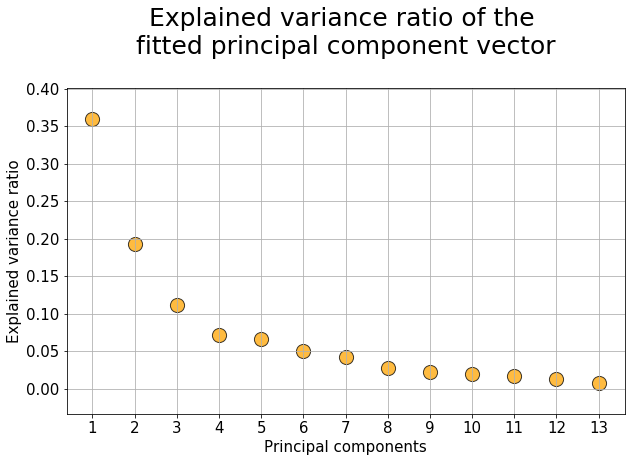

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()



The above plot means that the $1^{st}$ principal component explains about 36% of the total variance in the data and the $2^{nd}$ component explians further 20%. Therefore, if we just consider first two components, they together explain 56% of the total variance.

### ransform the scaled data set using the fitted PCA object

In [26]:
dfx_trans = pca.transform(dfx)

### Put it in a data frame

In [29]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.230243,0.302313,-2.032920,-0.281906,-0.259540,-0.927615,0.079724,1.026470,-0.313145,0.131256,-0.153252,0.401035,0.001901
1,2.531922,-1.062257,0.976724,0.735727,-0.198602,0.557252,0.432350,-0.335611,-1.179069,0.006752,-0.275374,0.003380,0.021606
2,3.754677,-2.805309,-0.180370,0.577125,-0.257871,0.100109,-0.364924,0.646847,0.067906,0.373320,0.696435,-0.241100,-0.370466
3,1.020131,-0.888380,2.023870,-0.432792,0.275235,-0.403139,0.454721,0.412033,0.338059,-0.096320,-0.541460,-0.187797,-0.081820
4,3.049199,-2.170007,-0.638747,-0.487628,-0.631358,0.130817,0.421297,0.398731,-0.113454,-0.020025,0.389118,-0.380857,0.144580
5,2.458228,-1.207065,-0.988236,-0.004678,-1.030103,-0.613463,0.066139,-0.375278,-0.534132,0.925159,-0.558895,0.188744,-0.274621
6,2.061605,-1.640485,0.143768,-1.199707,0.010484,-1.445137,0.058393,0.228268,0.081620,0.793148,0.188117,0.411333,-0.113465
7,2.518445,-0.960837,-1.782380,0.104717,-0.873702,-0.121170,0.134333,-0.507041,0.600816,0.177453,-0.572164,-0.593215,0.139818
8,2.767971,-0.824521,-0.988956,0.374905,-0.437814,0.144245,-0.869921,0.152959,0.213625,0.191210,-0.003152,0.565868,-0.044375
9,3.489161,-1.355190,-0.429319,0.039981,-0.316885,-0.178681,0.273092,-1.198160,-0.485930,-0.133965,0.754030,-0.102190,0.123430


### Plot the first two columns of this transformed data set with the color set to original ground truth class label

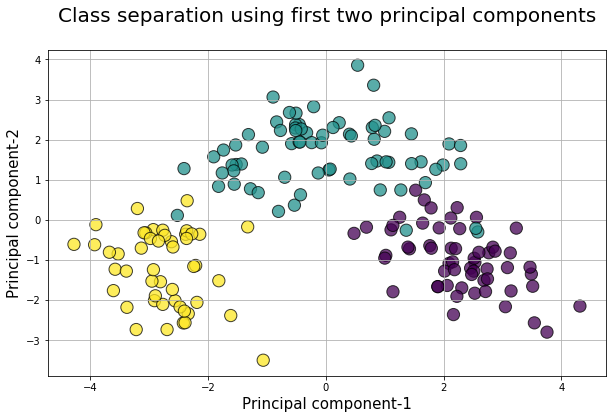

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=y,edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()